In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
plt.rcParams["figure.figsize"] = (7,5)

In [12]:
def show_pie_chart(data, labels, explode, title):
    fig, axis = plt.subplots()
    axis.pie(data, labels= labels, explode= explode, shadow= True, autopct= '%1.1f%%')
    fig.set_size_inches(5, 5)
    plt.title(title)
    plt.show()

In [13]:
def show_bar_chart(data, labels, x_label, y_label, title):
    fig, axis = plt.subplots()
    axis.bar(labels, data)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [14]:
def show_bar_chart_overlapped(data_1, data_2, labels, x_label, y_label, title):
    fig, axis = plt.subplots()
    axis.bar(labels, data_1)
    axis.bar(labels, data_2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(('Individual', 'both'))
    plt.show()

In [15]:
repo_df = pd.read_csv('mining_results/repository_mining_data_11012020_154314.csv', index_col=0)
del repo_df['repo_name']
repo_df

,total_file_cnt,total_java_files,listener_pattern_cnt,visitor_pattern_cnt,enter_method_cnt,exit_method_cnt,enter_exit_method_cnt,visit_method_cnt
repo_id,,,,,,,,
1,658,135,0,2,0,0,0,37
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
434,0,0,0,0,0,0,0,0
435,0,0,0,0,0,0,0,0
436,0,0,0,0,0,0,0,0


In [16]:
visitor_pattern_cnt = 0
listener_pattern_cnt = 0
listener_visitor_both_cnt = 0
for enter, exit, visit in zip(repo_df['enter_method_cnt'], repo_df['exit_method_cnt'], repo_df['visit_method_cnt']):
    if visit > 0:
        visitor_pattern_cnt += 1
    if enter > 0 or exit > 0:
        listener_pattern_cnt += 1
        
    if (enter > 0 or exit > 0) and visit >0:
        listener_visitor_both_cnt += 1
        
visitor_pattern_cnt  -= listener_visitor_both_cnt
listener_pattern_cnt  -= listener_visitor_both_cnt

print(f' {visitor_pattern_cnt} {listener_pattern_cnt} ')

 1 0 


In [17]:
visitor_pattern_cnt  = 10
listener_pattern_cnt  = 16
listener_visitor_both_cnt = 4

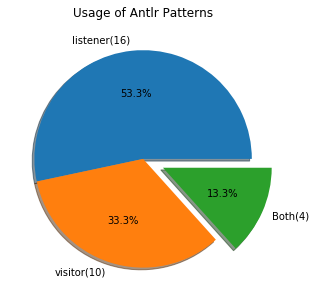

In [18]:
pie_chart_datapoints = [listener_pattern_cnt, visitor_pattern_cnt, listener_visitor_both_cnt]
pie_chart_labels = ['listener(' + str(listener_pattern_cnt) + ')', 'visitor(' + str(visitor_pattern_cnt) + ')', 'Both(' + str(listener_visitor_both_cnt) + ')']
show_pie_chart(pie_chart_datapoints, pie_chart_labels, [0, 0, 0.2], 'Usage of Antlr Patterns')

In [19]:
listener_method_cnt = sum(repo_df['enter_method_cnt']) + sum(repo_df['exit_method_cnt'])
visitor_method_cnt = sum(repo_df['visit_method_cnt'])

In [20]:
listener_method_cnt = 199
visitor_method_cnt = 879

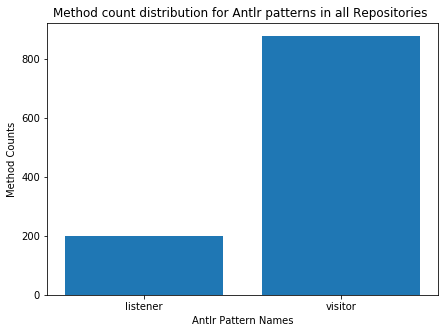

In [21]:
bar_chart_datapoints = [listener_method_cnt, visitor_method_cnt]
bar_chart_labels = ['listener', 'visitor']
show_bar_chart(bar_chart_datapoints, bar_chart_labels, 'Antlr Pattern Names', 'Method Counts', 'Method count distribution for Antlr patterns in all Repositories ')

In [22]:
enter_exit_both_method_cnt = sum(repo_df['enter_exit_method_cnt'])
enter_method_cnt = sum(repo_df['enter_method_cnt'])
exit_method_cnt = sum(repo_df['exit_method_cnt'])

In [23]:
enter_exit_both_method_cnt = 17
enter_method_cnt = 58
exit_method_cnt = 98

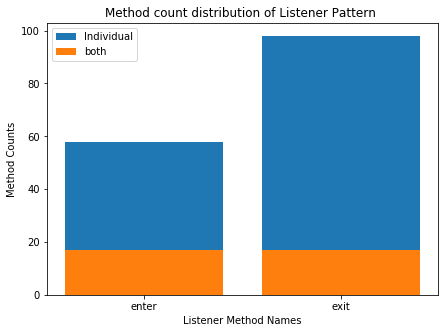

In [24]:
enter_exit_data_points = [enter_method_cnt, exit_method_cnt]
common_data_points = [enter_exit_both_method_cnt, enter_exit_both_method_cnt]
bar_chart_labels = ['enter', 'exit']
show_bar_chart_overlapped(enter_exit_data_points, common_data_points, bar_chart_labels, 'Listener Method Names', 'Method Counts', 'Method count distribution of Listener Pattern ')